# Object Recognition in Autism-Related Rat Models: Behavioral Phenotyping of Arid1b, Grin2b, and Scn2a Strains

This tutorial shows how to access the data related to [EMBER:000202](https://dandi.emberarchive.org/dandiset/000202) using pynwb.

This dataset contains behavioral data from the object recognition experiment, part of the [Rat Behavioural Phenotyping Pipeline Methodologies](https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/).

Contents:

- [Reading NWBFile locally](#read-nwb)
- [Access Subject Metadata](#access-subject)
- [Access Devices Metadata](#access-devices)
- [Access Behavioral Videos](#access-behavior)
- [Access Annotated Behavioral Events](#access-events)



# Select the subject and session to load

In [1]:
emberset_id = "000202"
session_id = "OR_STM-2022-11-07"
subject_id = "408-Arid1b(3)"

# Reading an NWB file locally<a id="read-nwb"></a>


This section demonstrates how to read an NWB file using `pynwb`.

Based on the [NWB File Basics](https://pynwb.readthedocs.io/en/stable/tutorials/general/plot_file.html#sphx-glr-tutorials-general-plot-file-py) tutorial from [PyNWB](https://pynwb.readthedocs.io/en/stable/#).

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.

Reading is carried out using the [NWBHDF5IO](https://pynwb.readthedocs.io/en/stable/pynwb.html#pynwb.NWBHDF5IO) class. To read the NWB file use the read mode ("r") to retrieve an NWBFile object.

In [2]:
from pynwb import NWBHDF5IO
from pathlib import Path
# Define the path to the NWB file
directory = Path("D:/kind_lab_conversion_nwb/behavioural_pipeline/object_recognition")
nwbfile_path = directory / f"sub-{subject_id}_ses-{session_id}.nwb"
io = NWBHDF5IO(path=nwbfile_path, load_namespaces=True)
nwbfile = io.read()

In [3]:
print(nwbfile.experiment_description)

This experiment is part of the Rat Behavioural Phenotyping Pipeline Methodologies https://sidb.org.uk/facilities/rat-behavioural-phenotyping-pipeline/.
As an initial effort to characterize the rat lines, these models are being behaviorally phenotyped at SIDB. 
Rat models are phenotyped according to a rigorous pipeline that assesses behaviours relevant to autism with intellectual disability, such as social and motor skills, and learning and sensory processing. 
Different cohorts of rats are run through different subsets of tasks to overcome potential order effects on behaviours and to limit the number of tasks each animal is put through.
This experiment investigated object recognition memory in different rat models 
(Arid1b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394518, 
Grin2b: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=14394515, 
Scn2a: https://rgd.mcw.edu/rgdweb/report/strain/main.html?id=25394530).
The experimenter was blind to genotype throughout the ex

In [4]:
print(nwbfile.session_description)

Experimental Day 5. Short-term memory test. 
Two identical objects (e.g. ceramic tea lights, glass ornaments, never face or animal related) 
were fixed in position (approximately 15 cm from the side and top edge of the arena). 
A rat was placed individually in the arena with the objects for a 15 min sample trial. 
The rat was then removed and placed in the holding bucket for 5 min. 
The objects were removed from the arena, the arena was cleaned with 70% ethanol and the objects 
replaced with a replica object and one novel object (counterbalanced for location and object between rats). 
The rat was returned to the arena for a 3 min test trial, 5 min after the sample trial.



Importantly, the `session start time` is the reference time for all timestamps in the file. For instance, an event with a timestamp of 0 in the file means the event occurred exactly at the session start time.

The `session_start_time` is extracted from the Freeze_Log.xls table.

In [5]:
print(nwbfile.session_start_time)

2022-11-07 09:49:45+01:00


# Access Subject Metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWB file.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.


In [6]:
nwbfile.subject

subject pynwb.file.Subject at 0x1917283425200
Fields:
  age__reference: birth
  date_of_birth: 2022-09-02 00:00:00+02:00
  description: Subject housed in standard housing conditions. Cage identifier: 1.0.
  genotype: WT
  sex: M
  species: Rattus norvegicus
  strain: Arid1b
  subject_id: 408-Arid1b(3)

# Access Devices Metadata <a name="access-devices"></a>

This section demonstrates how to access the [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field in an NWB file.

The [Device](https://pynwb.readthedocs.io/en/stable/pynwb.device.html#module-pynwb.device) field can be accessed as `nwbfile.devices`.

In [7]:
nwbfile.devices["Arena"]

Arena pynwb.device.Device at 0x1917699107888
Fields:
  description: Custom built arena (60x60 cm) with black laminated wood walls and grey lino floor.The light intensity was uniformly maintained at ~20 lx. Objects were secured in fixed locations within the arena using 3m Dualock tape.
  manufacturer: Kanya UK

In [10]:
nwbfile.devices["camera_device 0"]

camera_device 0 abc.CameraDevice at 0x1917699107840
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

# Access Behavioral Video <a name="access-behavior"></a>

The behavioral video is stored as an external `ImageSeries` in the NWB file.

In [11]:
# List all behavioral video acquisitions
for name in nwbfile.acquisition:
    if "BehavioralVideo" in name:
        print(name)

BehavioralVideoSampleTrial
BehavioralVideoTestTrial


In [12]:
test_trial_video = nwbfile.acquisition["BehavioralVideoTestTrial"]
test_trial_video

Data type,uint8
Shape,"(0, 0, 0)"
Array size,0.00 bytes
Chunk shape,None
Compression,None
Compression opts,None
Compression ratio,undefined
Data type,float64
Shape,"(4788,)"
Array size,37.41 KiB
Chunk shape,"(4788,)"


The video filepath:

In [13]:
test_trial_video.external_file[0]

'D:\\Kind-CN-data-share\\behavioural_pipeline\\Object Recognition\\Arid1b\\Arid1b(3)_OR\\Test STM\\converted\\2022-11-07 10-10-30_408_test.mp4'

The metadata of the device used to record the behavioral video:


In [14]:
test_trial_video.device

camera_device 0 abc.CameraDevice at 0x1917699107840
Fields:
  camera_name: BehavioralCamera
  description: CCTV camera mounted on ceiling above arenas for behavioral recording
  lens: Carl Zeiss lens with 20-step autofocus
  meters_per_pixel: 0.0004
  model: C920

# Access Annotated Behavioral Events <a name="access-events"></a>

The `nwbfile.processing["events]` contains annotated events. These are stored in the `AnnotatedEventsTable` type. The `AnnotatedEventsTable` type is a subtype of `DynamicTable`, where each row corresponds to a different event type. The table has a ragged (variable-length) 1D column of event times, such that each event type (row) is associated with an array of event times

You can convert the table to a `pandas.DataFrame` for easier exploration:


In [16]:
sample_behavioral_events = nwbfile.processing["behavior"]["SampleTrialBehavioralEvents"].to_dataframe()
test_behavioral_events = nwbfile.processing["behavior"]["TestTrialBehavioralEvents"].to_dataframe()

In [17]:
sample_behavioral_events

,duration,event_times,label,event_description,object_name,novelty,position
id,,,,,,,
0,"[3.9979999999999993, 11.763000000000005, 6.798...","[13.382, 30.58, 51.862, 75.061, 86.661, 159.54...",object on left,,pink JUICER,new,left
1,"[5.2010000000000005, 5.200999999999997, 2.3999...","[8.02, 20.981, 43.061, 66.26, 109.061, 127.221...",object on right,,pink JUICER,new,right


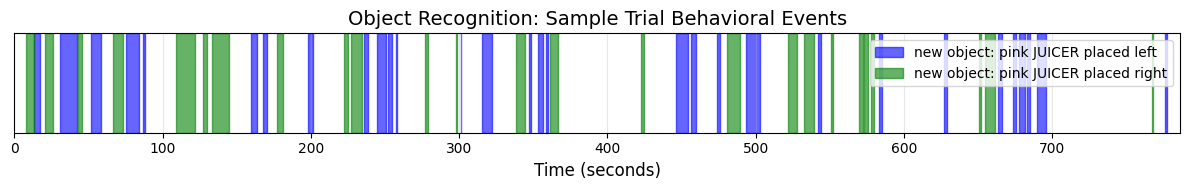

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(12, 2))

# Define colors for different locations
colors = ["blue", "green", "purple", "red"]

# Plot sample events
alpha = 0.6  # Alpha for duration rectangles

plt.title('Object Recognition: Sample Trial Behavioral Events', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.yticks([])  # Remove y-ticks since we're using the whole y-axis

# Filter out the Start events
object_events = sample_behavioral_events[sample_behavioral_events["object_name"] != ""]

# Plot object interaction events
for idx, row in object_events.iterrows():
    position = row["position"]
    novelty = row["novelty"]
    obejct_name = row["object_name"]
    color = colors[idx]

    # Convert to numpy arrays if they are lists
    event_times = np.array(row['event_times']) if len(row['event_times']) > 0 else np.array([])
    durations = np.array(row['duration']) if len(row['duration']) > 0 else np.array([])

    if len(event_times) > 0 and len(durations) > 0 and len(durations) == len(event_times):
        for i, (time, duration) in enumerate(zip(event_times, durations)):
            if not np.isnan(duration):
                # Plot duration as rectangle that spans the whole y-axis
                rect = patches.Rectangle(
                    (time, 0),
                    duration,
                    1.0,
                    alpha=alpha,
                    color=color,
                    edgecolor=None,
                    label=f"{novelty} object: {obejct_name} placed {position}" if i == 0 else "",
                )
                plt.gca().add_patch(rect)

# Set x-axis to show the full range of events
all_times = np.concatenate([np.array(row['event_times']) for _, row in object_events.iterrows() if len(row['event_times']) > 0])
if len(all_times) > 0:
    plt.xlim(max(0, min(all_times) - 10), max(all_times) + 10)

plt.ylim(0, 1)  # Set y-axis limits to match rectangle height
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [19]:
test_behavioral_events

,duration,event_times,label,event_description,object_name,novelty,position
id,,,,,,,
0,"[4.000999999999976, 2.0]","[1334.781, 1403.261]",object on left,,pink JUICER,old,left
1,"[1.5989999999999327, 2.800999999999931, 0.8010...","[1258.622, 1262.222, 1265.821, 1267.821, 1276....",object on right,,pink heart light,new,right


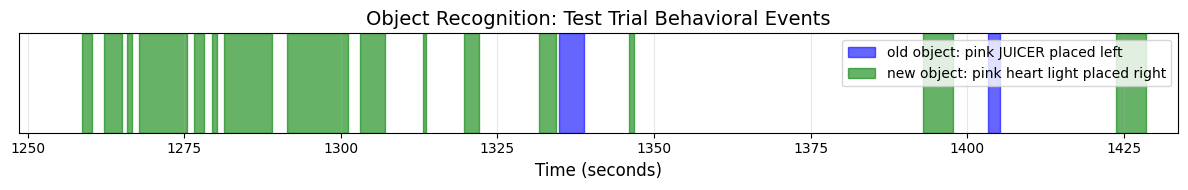

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure
plt.figure(figsize=(12, 2))

# Define colors for different locations
colors = ["blue", "green", "purple", "red", "yellow"]

# Plot sample events
alpha = 0.6  # Alpha for duration rectangles

plt.title("Object Recognition: Test Trial Behavioral Events", fontsize=14)
plt.xlabel("Time (seconds)", fontsize=12)
plt.yticks([])  # Remove y-ticks since we're using the whole y-axis

# Filter out the Start events
object_events = test_behavioral_events[test_behavioral_events["object_name"] != ""]

# Plot object interaction events
for idx, row in object_events.iterrows():
    position = row["position"]
    novelty = row["novelty"]
    obejct_name = row["object_name"]
    color = colors[idx]

    # Convert to numpy arrays if they are lists
    event_times = np.array(row["event_times"]) if len(row["event_times"]) > 0 else np.array([])
    durations = np.array(row["duration"]) if len(row["duration"]) > 0 else np.array([])

    if len(event_times) > 0 and len(durations) > 0 and len(durations) == len(event_times):
        for i, (time, duration) in enumerate(zip(event_times, durations)):
            if not np.isnan(duration):
                # Plot duration as rectangle that spans the whole y-axis
                rect = patches.Rectangle(
                    (time, 0),
                    duration,
                    1.0,
                    alpha=alpha,
                    color=color,
                    edgecolor=None,
                    label=f"{novelty} object: {obejct_name} placed {position}" if i == 0 else "",
                )
                plt.gca().add_patch(rect)

# Set x-axis to show the full range of events
all_times = np.concatenate(
    [np.array(row["event_times"]) for _, row in object_events.iterrows() if len(row["event_times"]) > 0]
)
if len(all_times) > 0:
    plt.xlim(max(0, min(all_times) - 10), max(all_times) + 10)

plt.ylim(0, 1)  # Set y-axis limits to match rectangle height
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")

plt.tight_layout()
plt.show()